# Spike_phase

I used this notebook to create the spikeA.Spike_phase class.

In [1]:
%load_ext autoreload
%autoreload 2

from spikeA.Dat_file_reader import Dat_file_reader
from spikeA.Session import Kilosort_session
from spikeA.Theta import Theta
from spikeA.Session import *
from spikeA.Spike_train_loader import Spike_train_loader
from spikeA.Cell_group import Cell_group
from spikeA.Spike_phase import Spike_phase
import spikeA.spike_time


import numpy as np
import matplotlib.pyplot as plt

In [2]:
mouse="bt8564"
date="23072021"
name=f"{mouse}-{date}-0105"
path=f"/adata/electro/{mouse}/{name}/"

In [3]:
ses = Kilosort_session(name=name, path = path)
ses.load_parameters_from_files()

In [4]:
# create a theta object to do theta analysis
theta = Theta(session=ses)

In [5]:
theta.load_theta_epochs_and_cycles()

In [6]:
stl = Spike_train_loader()
stl.load_spike_train_kilosort(ses)
cg = Cell_group(stl)
print("Number of neurons: {}".format(len(cg.neuron_list)))

Number of neurons: 27


Get the phase of the spikes of one neuron.

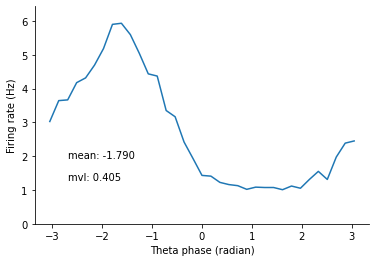

In [7]:
st = cg.neuron_list[5].spike_train
sph = Spike_phase(st,theta.cycles[0])
sph.spike_phase()
fig,axes = plt.subplots(nrows=1, ncols=1) # we use pyplot.subplots to get a figure and axes.
sph.plot_phase_histogram(axes)
#sph.spike_phase_stats()
plt.savefig("/tmp/test_fig.png")

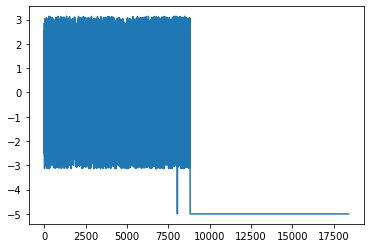

In [13]:
sph.phase[np.isnan(sph.phase)]=-5
fig,axes = plt.subplots(nrows=1, ncols=1) # we use pyplot.subplots to get a figure and axes.
axes.plot(sph.phase)


In [101]:
def spike_phase_python(st, cycle_start, cycle_end):
    """
    Calculate the phase of spikes
    
    Returned values are np.nan for invalid
    Phase goes from -pi to pi
    """
    cycle_indices = np.searchsorted(cycle_start, st, side='right') - 1
    valid_spikes = np.logical_and(st > cycle_start[cycle_indices], st < cycle_end[cycle_indices])
    cycle_duration = cycle_end[cycle_indices] - cycle_start[cycle_indices]
    phase = np.where(valid_spikes, (st - cycle_start[cycle_indices]) / cycle_duration * (2 * np.pi), np.nan) - np.pi
    
    return phase


In [106]:
%%time
st=sph.spike_train.st
cycles=sph.cycles
phase=spike_phase_python(st,cycles[:,0],cycles[:,1])
phase

CPU times: user 628 µs, sys: 65 µs, total: 693 µs
Wall time: 557 µs


array([-1.86017683,  2.37345113, -2.49674888, ..., -2.97700194,
       -1.54532395,  2.33194383])

(18398,)
(4324,)


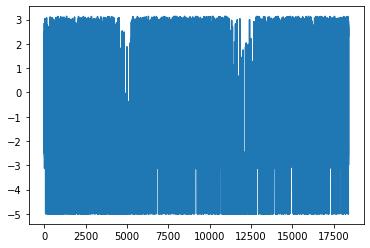

In [107]:
print(phase.shape)
print(phase[np.isnan(phase)].shape)
phase[np.isnan(phase)]=-5
plt.plot(phase)

In [108]:
%%time
sph.spike_phase()
sph.phase

CPU times: user 197 ms, sys: 112 µs, total: 197 ms
Wall time: 197 ms


array([-1.86017683,  2.37345113, -2.49674888, ...,         nan,
               nan,         nan])

(18398,)
(9581,)


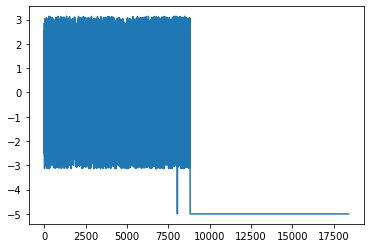

In [109]:
phase=sph.phase
print(phase.shape)
print(phase[np.isnan(phase)].shape)
phase[np.isnan(phase)]=-5
plt.plot(phase)

We can do it for all neurons in the Cell_group

In [11]:
sph_list = [] # get the spike phase for all neurons
for i, n in enumerate(cg.neuron_list):
    st = cg.neuron_list[i].spike_train
    sph = Spike_phase(st,theta.cycles[0])
    sph.spike_phase()
    sph_list.append(sph)

We can now plot all phase histograms

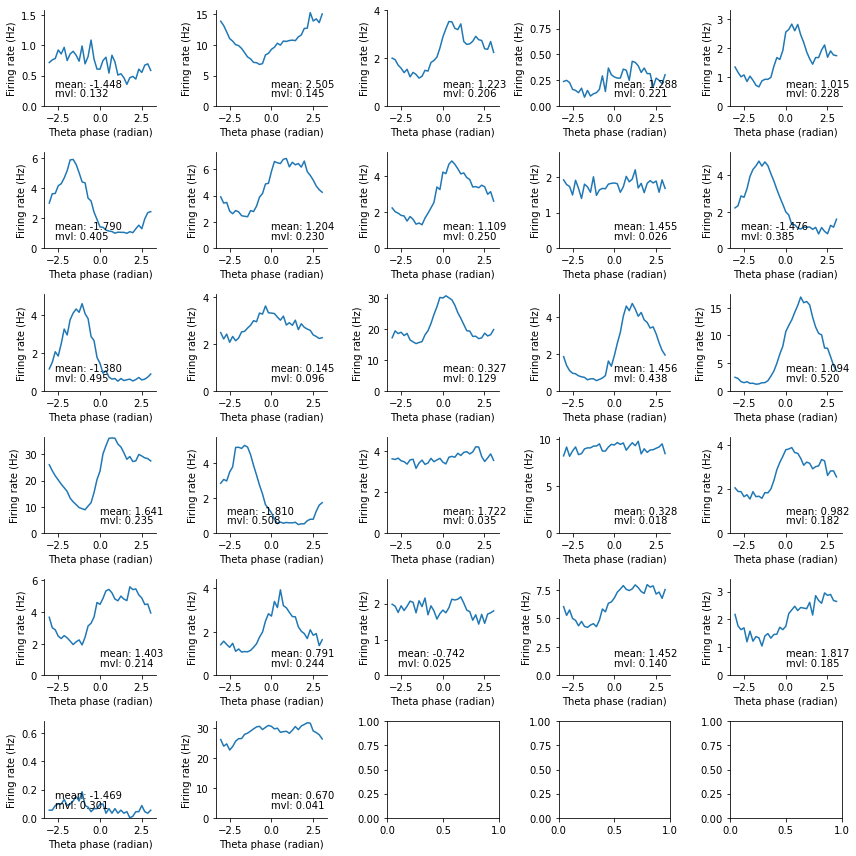

In [12]:
nCols = 5
fig,axes = plt.subplots(nrows=6, ncols=nCols,figsize=(6*2,6*2)) # we use pyplot.subplots to get a figure and axes.
for i, n in enumerate(cg.neuron_list):
    r = int(i/nCols)
    c = i%nCols
    sph = sph_list[i]
    ax = axes[r,c]
    sph.plot_phase_histogram(ax)
    
plt.tight_layout()